#length

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_excel("hemo_analysis_data.xlsx")

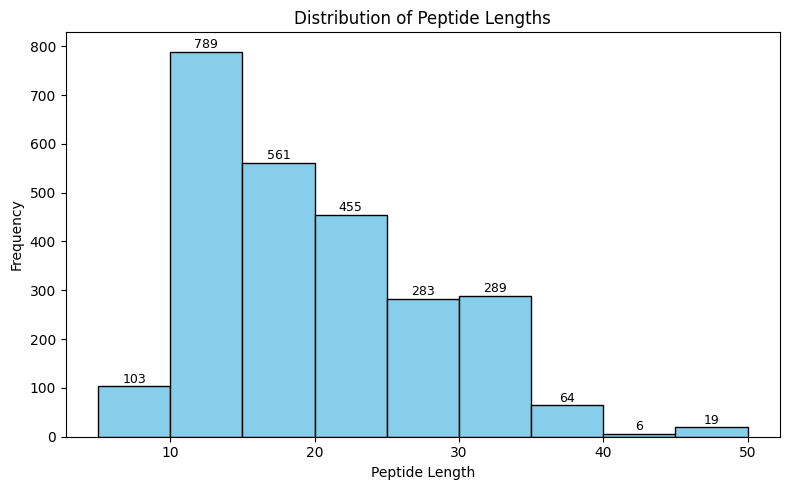

In [ ]:
# Use a better variable name than `len` (which is a Python built-in function)
peptide_lengths = df['length']


bins=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


# Plot histogram using matplotlib directly
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(peptide_lengths, bins=bins, color='skyblue', edgecolor='black')

# Add frequency labels on top of each bar
for count, patch in zip(counts, patches):
    if count > 0:
        # Get the center of the bar
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        plt.text(x, y + 1, str(int(count)), ha='center', va='bottom', fontsize=9)

# Axis labels and title
plt.xlabel("Peptide Length")
plt.ylabel("Frequency")
plt.title("Distribution of Peptide Lengths")

# Save and show
plt.tight_layout()
plt.savefig("length_histogram_plot.jpg", dpi=600)
plt.show()

#Composition analysis

In [ ]:
from collections import Counter
import pandas as pd

def compute_aac(peptides):
    """
    Compute the amino acid composition (AAC) for a list of peptide sequences.

    Parameters:
    peptides (list): List of peptide sequences (strings).

    Returns:
    pd.DataFrame: DataFrame containing AAC percentages for each peptide.
    """
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    aac_list = []

    for peptide in peptides:
        length = len(peptide)
        counts = Counter(peptide)
        aac = {aa: (counts.get(aa, 0) / length) * 100 for aa in amino_acids}
        aac_list.append(aac)

    return pd.DataFrame(aac_list)

# Example usage:
peptides = ['ACDEFGHIKLMNPQRSTVWY', 'AAACCCGGGTTT']
aac_df = compute_aac(peptides)
print(aac_df)


      A     C    D    E    F     G    H    I    K    L    M    N    P    Q  \
0   5.0   5.0  5.0  5.0  5.0   5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0   
1  25.0  25.0  0.0  0.0  0.0  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     R    S     T    V    W    Y  
0  5.0  5.0   5.0  5.0  5.0  5.0  
1  0.0  0.0  25.0  0.0  0.0  0.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


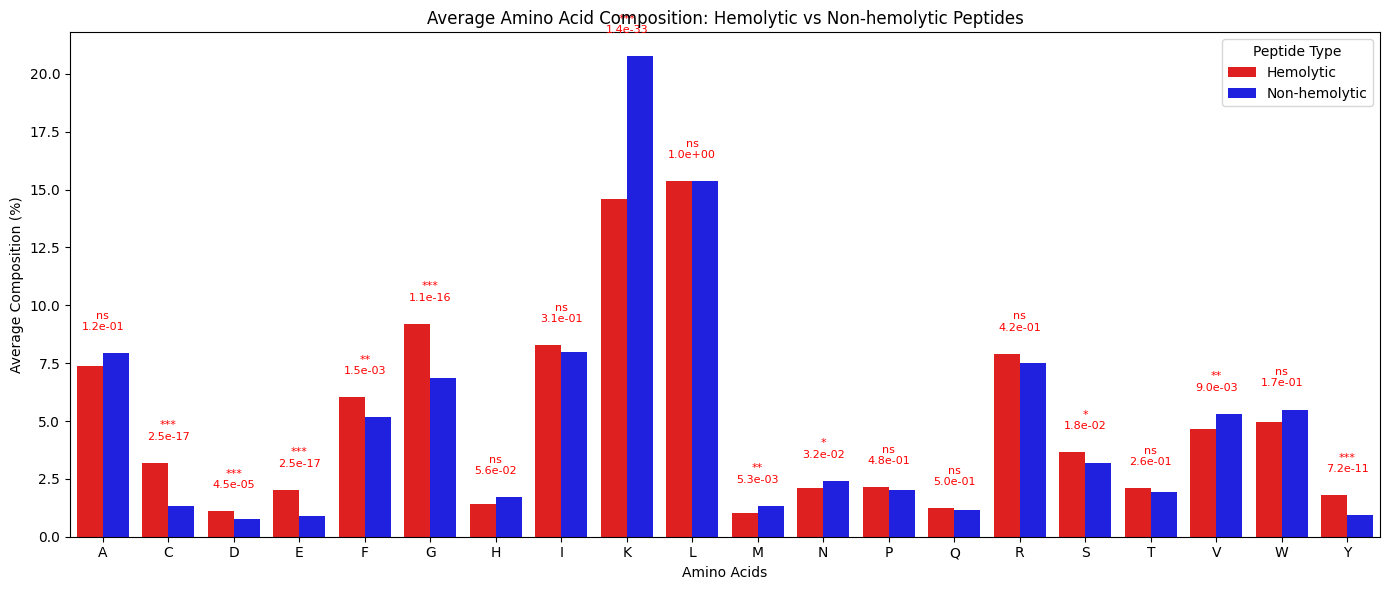

In [ ]:

# Step 1: Load the data
df = pd.read_excel("hemo_analysis_data.xlsx")
  # Replace with your actual file name

# Step 2: Separate hemolytic and non-hemolytic data
df_hemo = df[df["label"] == 1]
df_nonhemo = df[df["label"] == 0]

# Step 3: Extract AAC columns and clean names
aac_cols = [col for col in df.columns if col.startswith("AAC_")]
aac_short = [col.split("_")[-1] for col in aac_cols]

df_hemo_aac = df_hemo[aac_cols]
df_nonhemo_aac = df_nonhemo[aac_cols]
df_hemo_aac.columns = aac_short
df_nonhemo_aac.columns = aac_short

# Step 4: Compute average AAC per group
hemo_mean = df_hemo_aac.mean()
nonhemo_mean = df_nonhemo_aac.mean()

# Step 5: T-test for significance
p_values = []
for aa in aac_short:
    t_stat, p = ttest_ind(df_hemo_aac[aa], df_nonhemo_aac[aa], equal_var=False)
    p_values.append(p)

# Step 6: Prepare data for plotting
plot_df = pd.DataFrame({
    'Amino Acid': aac_short,
    'Hemolytic': hemo_mean.values,
    'Non-hemolytic': nonhemo_mean.values,
    'p-value': p_values
}).sort_values("Amino Acid")

# Melt for seaborn
plot_df_melted = pd.melt(plot_df, id_vars=["Amino Acid", "p-value"],
                         value_vars=["Hemolytic", "Non-hemolytic"],
                         var_name="Group", value_name="Composition")

# Step 7: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_df_melted, x="Amino Acid", y="Composition", hue="Group", palette=["red", "blue"])

# Step 8: Annotate with p-values
for idx, row in plot_df.iterrows():
    aa = row["Amino Acid"]
    p = row["p-value"]
    if p < 0.001:
        label = "***"
    elif p < 0.01:
        label = "**"
    elif p < 0.05:
        label = "*"
    else:
        label = "ns"
    val = max(row["Hemolytic"], row["Non-hemolytic"])
    plt.text(idx, val + 1, label + f"\n{p:.1e}", ha='center', fontsize=8, color="red")

plt.title("Average Amino Acid Composition: Hemolytic vs Non-hemolytic Peptides")
plt.ylabel("Average Composition (%)")
plt.xlabel("Amino Acids")
plt.legend(title="Peptide Type")
plt.tight_layout()

plt.savefig("acc_plot.jpg", dpi=600)
plt.show()


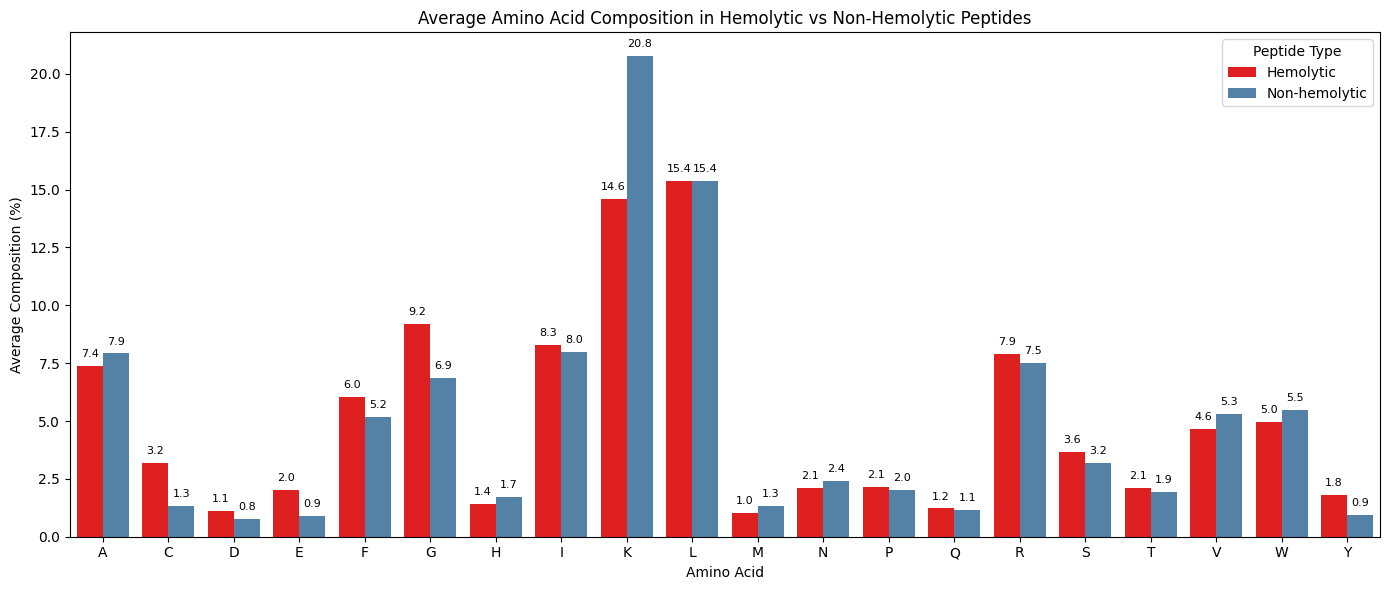

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file with correct encoding
df = pd.read_excel("hemo_analysis_data.xlsx")

# Get AAC columns
aac_columns = [col for col in df.columns if col.startswith("AAC_")]

# Separate based on label
df_hemo = df[df["label"] == 1]
df_nonhemo = df[df["label"] == 0]

# Compute average AAC
hemo_avg = df_hemo[aac_columns].mean()
nonhemo_avg = df_nonhemo[aac_columns].mean()

# Clean column names
amino_acids = [col.replace("AAC_", "") for col in aac_columns]

# Prepare plot data
plot_df = pd.DataFrame({
    "Amino Acid": amino_acids,
    "Hemolytic": hemo_avg.values,
    "Non-hemolytic": nonhemo_avg.values
}).melt(id_vars="Amino Acid", var_name="Type", value_name="Composition")

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=plot_df, x="Amino Acid", y="Composition", hue="Type", palette=["red", "steelblue"])

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.3,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            fontsize=8
        )

# Titles and labels
plt.title("Average Amino Acid Composition in Hemolytic vs Non-Hemolytic Peptides")
plt.ylabel("Average Composition (%)")
plt.xlabel("Amino Acid")
plt.legend(title="Peptide Type")
plt.tight_layout()
plt.savefig("acc_plot.jpg", dpi=600)
plt.show()


#DBlogo

In [ ]:
# STEP 1: Install dmslogo
!pip install git+https://github.com/jbloomlab/dmslogo


  Cloning https://github.com/jbloomlab/dmslogo to /tmp/pip-req-build-hpug4ex6
  Running command git clone --filter=blob:none --quiet https://github.com/jbloomlab/dmslogo /tmp/pip-req-build-hpug4ex6
  Resolved https://github.com/jbloomlab/dmslogo to commit 31160ecdf74107b3b720c07dac6a2e043d194050
  Preparing metadata (setup.py) ... done


In [ ]:
# STEP 3: Load data and prepare sequences
import pandas as pd

# Load Excel (adjust column names if needed)
df = pd.read_excel("hemo_data.xlsx")  # Columns: 'seq' and 'label'

# Filter sequences
strong_hemolytic = df[df['label'] == 1]['seq'].tolist()
weak_hemolytic = df[df['label'] == 0]['seq'].tolist()

# Pad sequences to uniform length (max = 50)
max_len = 50
pad_seq = lambda s: s.ljust(max_len, '-')
strong_hemolytic = [pad_seq(seq) for seq in strong_hemolytic]
weak_hemolytic = [pad_seq(seq) for seq in weak_hemolytic]


In [ ]:
# STEP 4: Generate EDLogo and save to PDF
from dmslogo import dmslogo

dmslogo.make_dmslogo(
    seqs=strong_hemolytic,
    compseqs=weak_hemolytic,
    alphabet='protein',
    plottype='edlogo',
    title='EDLogo: Strong vs Weak Hemolytic Peptides',
    outfile='/content/edlogo_output.pdf'
)


ImportError: cannot import name 'dmslogo' from 'dmslogo' (/usr/local/lib/python3.11/dist-packages/dmslogo/__init__.py)

In [ ]:
from google.colab import files
files.download("edlogo_output.pdf")


FileNotFoundError: Cannot find file: edlogo_output.pdf

In [ ]:
from dmslogo import dmslogo


ImportError: cannot import name 'dmslogo' from 'dmslogo' (/usr/local/lib/python3.11/dist-packages/dmslogo/__init__.py)

In [ ]:
pip install logomaker biopython pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from logolas import Logo
from logolas.probabilitylogo import *

# Step 1: Load your Excel file
df = pd.read_excel("hemo_data.xlsx")

# Step 2: Separate sequences into two groups
hemo_seqs = df[df['label'] == 1]['seq'].tolist()
non_hemo_seqs = df[df['label'] == 0]['seq'].tolist()

# Step 3: Convert sequences to alignment matrix format
def make_alignment(seqs):
    max_len = max(len(seq) for seq in seqs)
    return pd.DataFrame([list(seq.ljust(max_len, '-')) for seq in seqs])

hemo_df = make_alignment(hemo_seqs)
non_hemo_df = make_alignment(non_hemo_seqs)

# Step 4: Calculate frequency matrix
def get_freq_matrix(df):
    freq_matrix = df.apply(lambda col: col.value_counts(normalize=True)).fillna(0)
    return freq_matrix

hemo_freq = get_freq_matrix(hemo_df)
non_hemo_freq = get_freq_matrix(non_hemo_df)

# Step 5: Enrichment-depletion: log ratio of frequencies
import numpy as np
log_ratio = np.log2((hemo_freq + 1e-6) / (non_hemo_freq + 1e-6))  # Add small value to avoid divide-by-zero

# Step 6: Plot the enrichment-depletion logo
Logo(data_matrix=log_ratio.T, center_letter=False,
     color_scheme='chemistry',
     font_name='Arial Rounded MT Bold').plot(figsize=(15, 5), title="Enrichment-Depletion Logo: Hemolytic vs Non-Hemolytic")


ModuleNotFoundError: No module named 'logolas'

In [ ]:
! pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 20.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from collections import Counter

# Load your data
df = pd.read_excel("hemo_data_with_AAC.xlsx")  # or use .csv depending on your file format

# Select sequences and standardize length (e.g., first 10 residues)
seqs = df['seq'].dropna().str.upper().tolist()
seqs = [s[:10] if len(s) >= 10 else s.ljust(10, '-') for s in seqs]  # Pad short sequences with '-'

# Get standard 20 amino acids (excluding gaps)
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Initialize position-wise count dictionary
position_counts = [Counter() for _ in range(10)]  # For first 10 positions

# Fill position-wise counts
for seq in seqs:
    for i, aa in enumerate(seq[:10]):
        if aa in amino_acids:
            position_counts[i][aa] += 1

# Convert to DataFrame
position_df = pd.DataFrame(position_counts).fillna(0).T  # shape: (positions x AAs)

# Normalize to frequencies
freq_df = position_df.div(position_df.sum(axis=1), axis=0)

# Plot sequence logo
logo = logomaker.Logo(freq_df, color_scheme='classic', width=0.8, stack_order='small_on_top', figsize=(10, 4))
logo.ax.set_xlabel('Position', fontsize=14)
logo.ax.set_ylabel('Frequency', fontsize=14)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: 'R'

In [ ]:
def get_freq_df(sub_df, seq_len=10):
    seqs = sub_df['seq'].dropna().str.upper().tolist()
    # Trim/pad to fixed length
    seqs = [s[:seq_len] if len(s) >= seq_len else s.ljust(seq_len, '-') for s in seqs]

    # Initialize counters
    position_counts = [Counter() for _ in range(seq_len)]

    # Count amino acids at each position
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in amino_acids:
                position_counts[i][aa] += 1

    # Build and normalize
    df_counts = pd.DataFrame(position_counts).fillna(0)
    df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

    return df_freq.T  # Transpose: rows = positions, cols = AAs


In [ ]:
# Build DataFrame and normalize to frequencies
df_counts = pd.DataFrame(position_counts).fillna(0)
df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

# Transpose so rows = positions, columns = AAs
df_freq = df_freq.T  # <--- this is the key fix


In [ ]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from collections import Counter

# Load the Excel data
df = pd.read_excel("hemo_data_with_AAC.xlsx")

# Standard amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Function to process sequences and return frequency DataFrame
def get_freq_df(sub_df, seq_len=10):
    seqs = sub_df['seq'].dropna().str.upper().tolist()
    # Trim/pad to fixed length
    seqs = [s[:seq_len] if len(s) >= seq_len else s.ljust(seq_len, '-') for s in seqs]

    # Initialize counters
    position_counts = [Counter() for _ in range(seq_len)]

    # Count amino acids at each position
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in amino_acids:
                position_counts[i][aa] += 1

    # Build DataFrame and normalize to frequencies
    df_counts = pd.DataFrame(position_counts).fillna(0).T
    df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

    return df_freq

# Get frequency DataFrames
pos_freq_df = get_freq_df(df[df['label'] == 1], seq_len=10)
neg_freq_df = get_freq_df(df[df['label'] == 0], seq_len=10)

# Plot Positive Sequence Logo
plt.figure(figsize=(10, 4))
logo_pos = logomaker.Logo(pos_freq_df, color_scheme='classic', width=0.8, stack_order='small_on_top')
logo_pos.ax.set_title('Sequence Logo - Positive Peptides', fontsize=16)
logo_pos.ax.set_xlabel('Position', fontsize=14)
logo_pos.ax.set_ylabel('Frequency', fontsize=14)
logo_pos.style_spines(visible=False)
logo_pos.style_spines(spines=['left', 'bottom'], visible=True)
plt.tight_layout()
plt.show()

# Plot Negative Sequence Logo
plt.figure(figsize=(10, 4))
logo_neg = logomaker.Logo(neg_freq_df, color_scheme='classic', width=0.8, stack_order='small_on_top')
logo_neg.ax.set_title('Sequence Logo - Negative Peptides', fontsize=16)
logo_neg.ax.set_xlabel('Position', fontsize=14)
logo_neg.ax.set_ylabel('Frequency', fontsize=14)
logo_neg.style_spines(visible=False)
logo_neg.style_spines(spines=['left', 'bottom'], visible=True)
plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: 'I'

<Figure size 1000x400 with 0 Axes>

In [ ]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
df = pd.read_excel("hemo_data_with_AAC.xlsx")  # or use CSV if needed


In [ ]:
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")


In [ ]:
def get_freq_df(sub_df, seq_len=10):
    seqs = sub_df['seq'].dropna().str.upper().tolist()
    # Trim or pad each sequence to desired length
    seqs = [s[:seq_len] if len(s) >= seq_len else s.ljust(seq_len, '-') for s in seqs]

    # Count AAs at each position
    position_counts = [Counter() for _ in range(seq_len)]
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in amino_acids:
                position_counts[i][aa] += 1

    # Create DataFrame from counts
    df_counts = pd.DataFrame(position_counts).fillna(0)
    df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

    return df_freq.T  # Transpose to make positions as rows


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

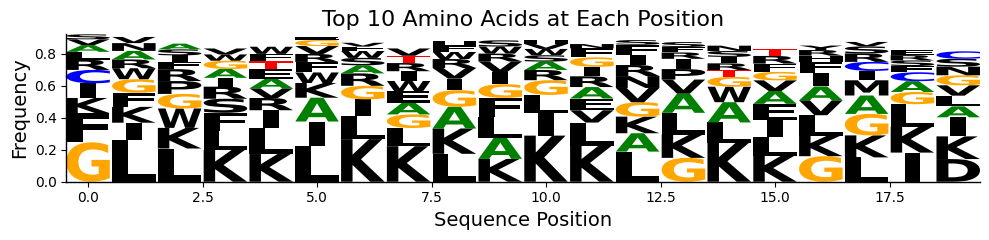

In [ ]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from collections import Counter

# Load data
df = pd.read_excel("hemo_data_with_AAC.xlsx")

# Define standard amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Choose number of positions to analyze
seq_len = 20  # or 15, 20, etc.

# Prepare sequence data
sequences = df['seq'].dropna().str.upper().tolist()
sequences = [s[:seq_len].ljust(seq_len, '-') for s in sequences]  # pad short seqs

# Count amino acid frequency at each position
position_counts = [Counter() for _ in range(seq_len)]
for seq in sequences:
    for i, aa in enumerate(seq):
        if aa in amino_acids:
            position_counts[i][aa] += 1

# Build frequency DataFrame
df_counts = pd.DataFrame(position_counts).fillna(0)
df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)  # normalize to frequency

# Keep only top 10 amino acids per position
for i in df_freq.index:
    top10 = df_freq.loc[i].nlargest(10).index
    for aa in df_freq.columns:
        if aa not in top10:
            df_freq.at[i, aa] = 0

# Transpose for logomaker: rows = positions, cols = amino acids
df_logo = df_freq.copy()

# Plot
plt.figure(figsize=(10, 4))
logo = logomaker.Logo(df_logo, color_scheme='classic', stack_order='small_on_top')
logo.ax.set_title("Top 10 Amino Acids at Each Position", fontsize=16)
logo.ax.set_xlabel("Sequence Position", fontsize=14)
logo.ax.set_ylabel("Frequency", fontsize=14)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

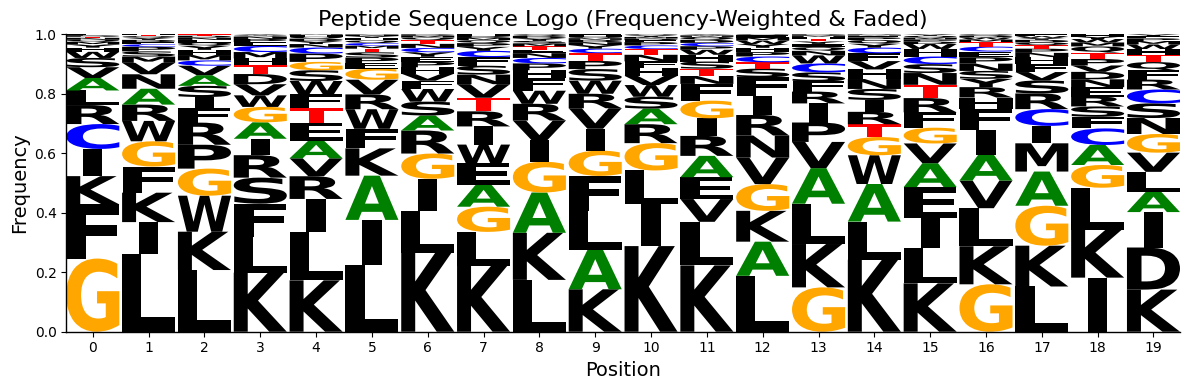

In [ ]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from collections import Counter

# Load data
df = pd.read_excel("hemo_data_with_AAC.xlsx")

# Define standard amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Choose sequence length
seq_len = 20

# Prepare sequences
sequences = df['seq'].dropna().str.upper().tolist()
sequences = [s[:seq_len].ljust(seq_len, '-') for s in sequences]

# Count amino acid frequency at each position
position_counts = [Counter() for _ in range(seq_len)]
for seq in sequences:
    for i, aa in enumerate(seq):
        if aa in amino_acids:
            position_counts[i][aa] += 1

# Convert counts to frequency
df_counts = pd.DataFrame(position_counts).fillna(0)
df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

# Plot using logomaker with custom transparency (alpha)
fig, ax = plt.subplots(figsize=(12, 4))

logo = logomaker.Logo(df_freq,
                      ax=ax,
                      color_scheme='classic',
                      stack_order='small_on_top',
                      fade_below=0.01)

# Apply custom alpha (fading) based on frequency
# Loop over each character drawn and set alpha (transparency)
for text in logo.ax.texts:
    y = text.get_position()[1]
    alpha = min(max(y, 0.1), 1.0)  # scale transparency by height
    text.set_alpha(alpha)

# Final touches
ax.set_title('Peptide Sequence Logo (Frequency-Weighted & Faded)', fontsize=16)
ax.set_xlabel('Position', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
logo.ax.set_xticks(range(seq_len))
plt.tight_layout()
plt.show()


In [ ]:
!pip install dmslogo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 18.9 MB/s eta 0:00:00
  Created wheel for dmslogo: filename=dmslogo-0.7.0-py3-none-any.whl size=324266 sha256=725058c94f1ef7a381b2470615df7e83a2282bdbb7873f9c8ed62e3958d67543
  Stored in directory: /root/.cache/pip/wheels/b9/a5/08/bd1a6cddbfcd91d16e5046edb661f4f266f905b3a73158a4a8
Successfully built dmslogo


In [ ]:
# Step 1: Install required libraries
!pip install biopython openpyxl pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 22.4 MB/s eta 0:00:00


In [ ]:
!pip install logomaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 82.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

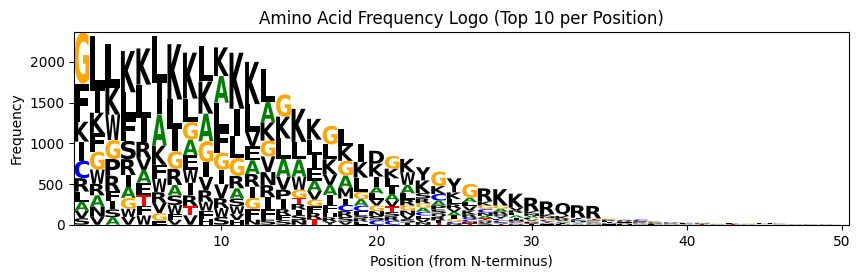

In [ ]:
from Bio import SeqIO
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Step 1: Read sequences from a FASTA file
input_file = '/content/hemo_data.fasta'
seqs = [str(record.seq) for record in SeqIO.parse(input_file, 'fasta')]

# Step 2: Calculate amino acid counts per position
max_len = max(len(seq) for seq in seqs)
aa_list = list('ACDEFGHIKLMNPQRSTVWY')
counts = pd.DataFrame(0, index=range(1, max_len+1), columns=aa_list)

for seq in seqs:
    for i, aa in enumerate(seq):
        if aa in aa_list:
            counts.loc[i+1, aa] += 1

# Step 3: Keep only top 10 amino acids per position
for idx, row in counts.iterrows():
    top10 = row.nlargest(10)
    counts.loc[idx, ~counts.columns.isin(top10.index)] = 0

# Step 4: Plot the logo
logomaker.Logo(counts, color_scheme='classic')
plt.xlabel('Position (from N-terminus)')
plt.ylabel('Frequency')
plt.title('Amino Acid Frequency Logo (Top 10 per Position)')
plt.show()


In [ ]:
from Bio import SeqIO
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

def get_counts(fasta_file):
    seqs = [str(record.seq) for record in SeqIO.parse(fasta_file, 'fasta')]
    max_len = max(len(seq) for seq in seqs)
    aa_list = list('ACDEFGHIKLMNPQRSTVWY')
    counts = pd.DataFrame(0, index=range(1, max_len+1), columns=aa_list)
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in aa_list:
                counts.loc[i+1, aa] += 1
    # Keep only top 10 amino acids per position
    for idx, row in counts.iterrows():
        top10 = row.nlargest(10)
        counts.loc[idx, ~counts.columns.isin(top10.index)] = 0
    return counts

# File paths
pos_file = '/content/hemolytic(pos1).fasta'
neg_file = '/content/nonhemolytic(neg0).fasta'

# Positive logo
pos_counts = get_counts(pos_file)
plt.figure(figsize=(10, 4))
logomaker.Logo(pos_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Hemolytic Positive Set')
plt.tight_layout()
plt.savefig('/content/positive_logo.png', dpi=600, bbox_inches='tight')  # 600 dpi
plt.close()  # Close the figure to avoid overlap[1][2]
plt.show()
# Negative logo
neg_counts = get_counts(neg_file)
plt.figure(figsize=(10, 4))
logomaker.Logo(neg_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Non-Hemolytic Negative Set')
plt.tight_layout()
plt.savefig('/content/negative_logo.png', dpi=600, bbox_inches='tight')  # 600 dpi
plt.close()  # Close the figure to avoid overlap[1][2]
plt.show()

/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

In [ ]:
from Bio import SeqIO
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

def get_counts(fasta_file, max_length=35):
    # Read and filter sequences by length
    seqs = [str(record.seq) for record in SeqIO.parse(fasta_file, 'fasta') if len(record.seq) <= max_length]
    aa_list = list('ACDEFGHIKLMNPQRSTVWY')
    counts = pd.DataFrame(0, index=range(1, max_length+1), columns=aa_list)
    for seq in seqs:
        for i, aa in enumerate(seq):
            if i < max_length and aa in aa_list:
                counts.loc[i+1, aa] += 1
    # Keep only top 10 amino acids per position
    for idx, row in counts.iterrows():
        top10 = row.nlargest(10)
        counts.loc[idx, ~counts.columns.isin(top10.index)] = 0
    return counts

# File paths
pos_file = '/content/hemolytic(pos1).fasta'
neg_file = '/content/nonhemolytic(neg0).fasta'

# Positive logo
pos_counts = get_counts(pos_file, max_length=35)
plt.figure(figsize=(10, 4))
logomaker.Logo(pos_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Hemolytic Positive Set (≤35 residues)')
plt.tight_layout()
plt.savefig('/content/positive_logo.png', dpi=600, bbox_inches='tight')
plt.close()

# Negative logo
neg_counts = get_counts(neg_file, max_length=35)
plt.figure(figsize=(10, 4))
logomaker.Logo(neg_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.title('Non-Hemolytic Negative Set (≤35 residues)')
plt.tight_layout()
plt.savefig('/content/negative_logo.png', dpi=600, bbox_inches='tight')
plt.close()


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

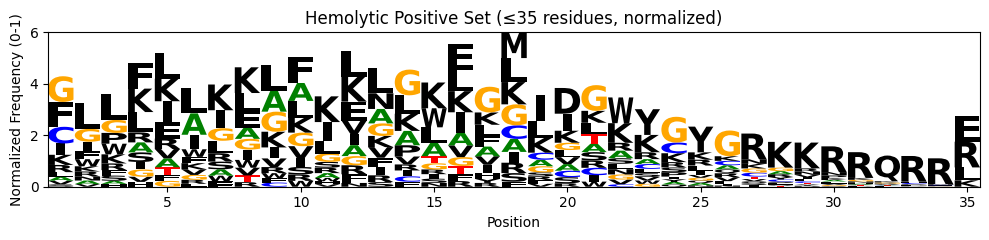

/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

<Figure size 1000x400 with 0 Axes>

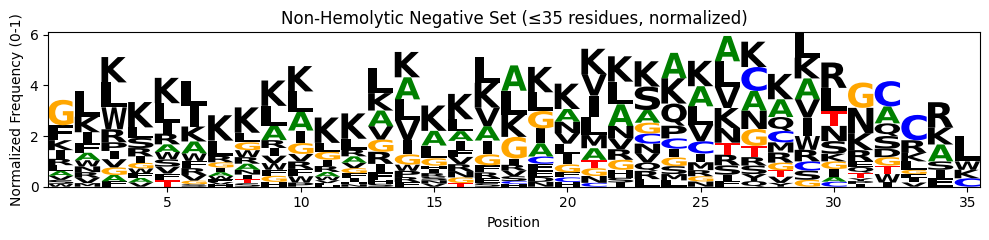

In [ ]:
from Bio import SeqIO
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

def get_counts(fasta_file, max_length=35):
    seqs = [str(record.seq) for record in SeqIO.parse(fasta_file, 'fasta') if len(record.seq) <= max_length]
    aa_list = list('ACDEFGHIKLMNPQRSTVWY')
    counts = pd.DataFrame(0, index=range(1, max_length+1), columns=aa_list)
    for seq in seqs:
        for i, aa in enumerate(seq):
            if i < max_length and aa in aa_list:
                counts.loc[i+1, aa] += 1
    # Keep only top 10 amino acids per position
    for idx, row in counts.iterrows():
        top10 = row.nlargest(10)
        counts.loc[idx, ~counts.columns.isin(top10.index)] = 0
    # Min-max normalization per row (position)
    counts = counts.astype(float)
    for idx, row in counts.iterrows():
        min_val = row.min()
        max_val = row.max()
        if max_val > min_val:  # Avoid division by zero
            counts.loc[idx] = (row - min_val) / (max_val - min_val)
        else:
            counts.loc[idx] = 0  # or row, if you want to keep original
    return counts

# File paths
pos_file = '/content/hemolytic(pos1).fasta'
neg_file = '/content/nonhemolytic(neg0).fasta'



# Positive logo
pos_counts = get_counts(pos_file, max_length=35)
plt.figure(figsize=(10, 4))
logomaker.Logo(pos_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Normalized Frequency (0-1)')
plt.title('Hemolytic Positive Set (≤35 residues, normalized)')
plt.tight_layout()
#plt.savefig('/content/positive_logo_normalized.png', dpi=600, bbox_inches='tight')
plt.show()   # <-- This displays the positive logo

# Negative logo
neg_counts = get_counts(neg_file, max_length=35)
plt.figure(figsize=(10, 4))
logomaker.Logo(neg_counts, color_scheme='classic')
plt.xlabel('Position')
plt.ylabel('Normalized Frequency (0-1)')
plt.title('Non-Hemolytic Negative Set (≤35 residues, normalized)')
plt.tight_layout()
#plt.savefig('/content/negative_logo_normalized.png', dpi=600, bbox_inches='tight')
plt.show()   # <-- This displays the negative logo


/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'D' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'E' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'F' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'H' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'I' is not in color_dict. Using black.
  warnings.warn(str(Error))
/usr/local/lib/python3.11/dist-packages/logomaker/src/error_handling.py:58: UserWarning:  Warning: Character 'K' is not 

TypeError: Glyph.__init__() got an unexpected keyword argument 'center'

<Figure size 1000x400 with 0 Axes>

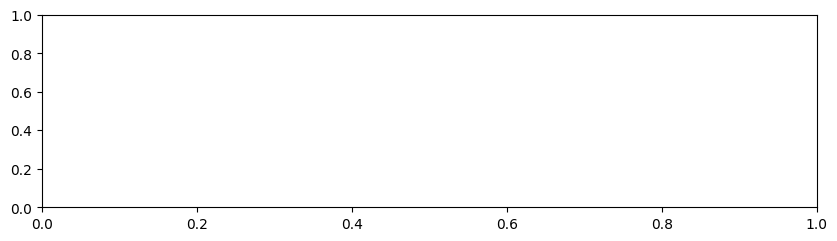

In [ ]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker

def read_fasta_sequences(fasta_file, length=15):
    """Read sequences from FASTA and truncate or pad to a fixed length of 15."""
    seqs = []
    for record in SeqIO.parse(fasta_file, 'fasta'):
        seq = str(record.seq)
        if len(seq) >= length:
            seqs.append(seq[:length])
        else:
            seqs.append(seq.ljust(length, '-'))  # pad with '-' if shorter
    return seqs

def compute_frequency_matrix(seqs, aa_list, length=15):
    """Create a frequency matrix for amino acids at each position."""
    freq_matrix = pd.DataFrame(0, index=range(length), columns=aa_list)
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in aa_list:
                freq_matrix.loc[i, aa] += 1
    # Convert to frequency
    freq_matrix = freq_matrix.div(freq_matrix.sum(axis=1), axis=0)
    return freq_matrix.fillna(0)

def compute_log_odds(pos_freq, neg_freq):
    """Compute log2 enrichment (log-odds) matrix."""
    odds = (pos_freq + 1e-6) / (neg_freq + 1e-6)  # pseudocount to avoid division by 0
    log_odds = np.log2(odds)
    return log_odds

# Parameters
length = 15  # fixed length for N-terminal or C-terminal analysis
aa_list = list('ACDEFGHIKLMNPQRSTVWY')  # standard amino acids

# Input FASTA files
pos_file = '/content/hemolytic(pos1).fasta'
neg_file = '/content/nonhemolytic(neg0).fasta'

# Read sequences
pos_seqs = read_fasta_sequences(pos_file, length)
neg_seqs = read_fasta_sequences(neg_file, length)

# Frequency matrices
pos_freq = compute_frequency_matrix(pos_seqs, aa_list, length)
neg_freq = compute_frequency_matrix(neg_seqs, aa_list, length)

# Log-odds matrix
log_odds = compute_log_odds(pos_freq, neg_freq)
log_odds.index = np.arange(1, length + 1)  # 1-based indexing for plotting

# Plot TSL
plt.figure(figsize=(10, 4))
logomaker.Logo(log_odds,
               center=0,
               color_scheme='classic',
               vpad=0.1,
               stack_order='small_on_top')
plt.axhline(0, color='gray', linewidth=1)
plt.xlabel('Position (1–15)')
plt.ylabel('Log₂ Enrichment (Hemolytic vs Non-Hemolytic)')
plt.title('Two Sample Logo (TSL) for First 15 Residues')
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

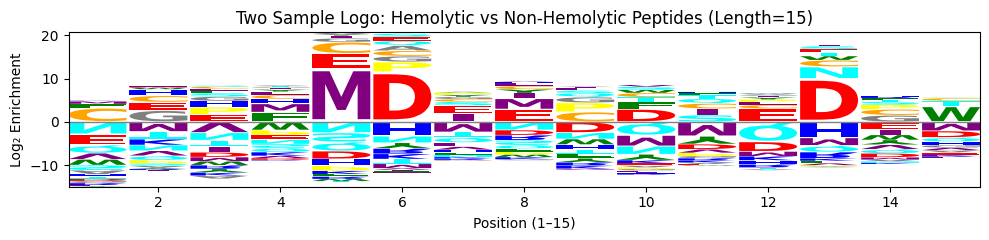

In [ ]:
from Bio import SeqIO
import pandas as pd
import numpy as np
import logomaker
import matplotlib.pyplot as plt

# Function to load and truncate sequences to 15 residues
def load_sequences(fasta_file, max_length=15):
    return [str(record.seq)[:max_length] for record in SeqIO.parse(fasta_file, 'fasta') if len(record.seq) >= max_length]

# Function to compute frequency counts at each position
def get_frequency_matrix(seqs, max_length=15):
    aa_list = list('ACDEFGHIKLMNPQRSTVWY')
    freq_df = pd.DataFrame(0, index=range(1, max_length+1), columns=aa_list)
    for seq in seqs:
        for i, aa in enumerate(seq):
            if aa in aa_list and i < max_length:
                freq_df.loc[i+1, aa] += 1
    freq_df = freq_df.div(freq_df.sum(axis=1), axis=0)  # Normalize per row
    return freq_df.fillna(0)

# Function to compute log-odds matrix
def compute_log_odds_matrix(pos_freq, neg_freq):
    epsilon = 1e-6  # Small constant to avoid log(0)
    log_odds = np.log2((pos_freq + epsilon) / (neg_freq + epsilon))
    return log_odds

# Function to plot TSL
def plot_tsl(matrix, title):
    matrix.index = np.arange(1, len(matrix)+1)

    # Define custom amino acid color scheme
    aa_color_dict = {
        'A': 'gray', 'C': 'orange', 'D': 'red', 'E': 'red',
        'F': 'green', 'G': 'gray', 'H': 'blue', 'I': 'purple',
        'K': 'blue', 'L': 'purple', 'M': 'purple', 'N': 'cyan',
        'P': 'yellow', 'Q': 'cyan', 'R': 'blue', 'S': 'cyan',
        'T': 'cyan', 'V': 'purple', 'W': 'green', 'Y': 'green'
    }

    plt.figure(figsize=(10, 4))
    logo = logomaker.Logo(matrix,
                          color_scheme=aa_color_dict,
                          vpad=0.1,
                          stack_order='small_on_top')
    plt.axhline(0, color='gray', linewidth=1)
    plt.xlabel('Position (1–15)')
    plt.ylabel('Log₂ Enrichment')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# === MAIN CODE ===

# File paths
pos_file = '/content/hemolytic(pos1).fasta'
neg_file = '/content/nonhemolytic(neg0).fasta'

# Load and process sequences (length = 15)
pos_seqs = load_sequences(pos_file, max_length=15)
neg_seqs = load_sequences(neg_file, max_length=15)

# Compute frequency matrices
pos_freq = get_frequency_matrix(pos_seqs, max_length=15)
neg_freq = get_frequency_matrix(neg_seqs, max_length=15)

# Compute log-odds matrix
log_odds = compute_log_odds_matrix(pos_freq, neg_freq)

# Plot the Two Sample Logo
plot_tsl(log_odds, title='Two Sample Logo: Hemolytic vs Non-Hemolytic Peptides (Length=15)')


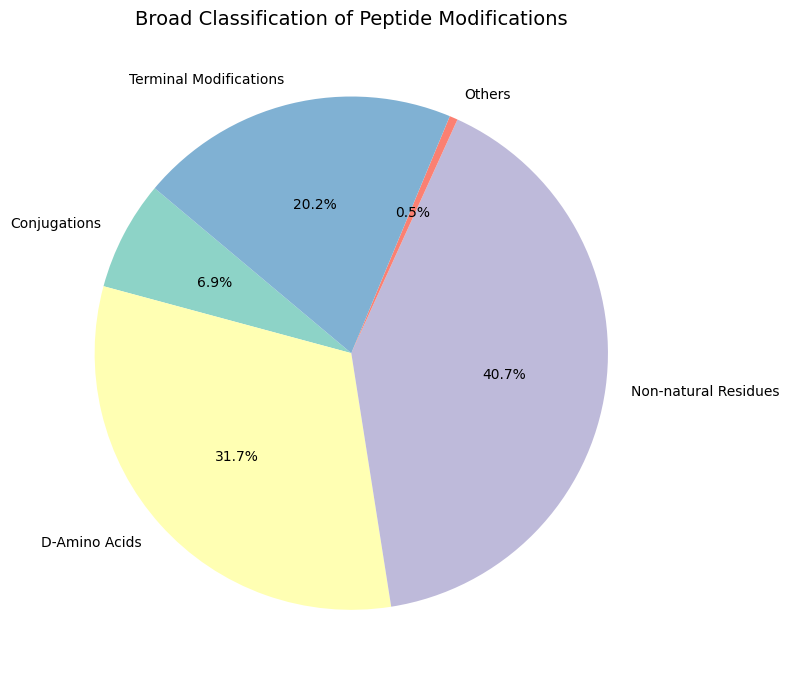

'Modification_Categories_600dpi.png'

In [ ]:
# Re-import necessary packages after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data
data = {
    "Modification": [
        "C-Terminal Modification", "conjugation", "conjugation, N-Terminal Modification",
        "conjugation, non natural residue", "D-Amino acids", "D-Amino acids, conjugation",
        "D-Amino acids, conjugation, non natural residue",
        "D-Amino acids, conjugation, non natural residue, N-Terminal Modification",
        "D-Amino acids, conjugation, non natural residue, N-Terminal Modification, C-Terminal Modification",
        "D-Amino acids, lipidated", "D-Amino acids, N-Terminal Modification",
        "D-Amino acids, non natural residue", "Isobaric residue annotation",
        "Isotopic Labelling", "Mutation", "N-Terminal Modification",
        "N-Terminal Modification, C-Terminal Modification", "non natural residue",
        "non natural residue, C-Terminal Modification",
        "non natural residue, conjugation, N-Terminal Modification",
        "non natural residue, N-Terminal Modification",
        "non natural residue, N-Terminal Modification, C-Terminal Modification",
        "non natural residue, Non-Natural Modifications (Chemical Derivatization)",
        "Protein Variants Deletions", "Protein Variants Insertions"
    ],
    "counts": [
        117, 253, 2, 40, 840, 41, 161, 68, 1, 16, 23, 10, 6, 9, 2, 528, 42, 1450,
        2, 1, 30, 16, 1, 1, 1
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Categorization
def categorize(mod):
    if "D-Amino" in mod:
        return "D-Amino Acids"
    elif "N-Terminal" in mod or "C-Terminal" in mod:
        return "Terminal Modifications"
    elif "non natural" in mod or "Non-Natural" in mod:
        return "Non-natural Residues"
    elif "conjugation" in mod:
        return "Conjugations"
    else:
        return "Others"

df["Category"] = df["Modification"].apply(categorize)

# Summarize
summary = df.groupby("Category")["counts"].sum().reset_index()

# Plot
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set3", len(summary))
plt.pie(summary["counts"], labels=summary["Category"], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Broad Classification of Peptide Modifications", fontsize=14)
plt.tight_layout()

# Save
output_path = "Modification_Categories_600dpi.png"
plt.savefig(output_path, dpi=600)
plt.show()

output_path


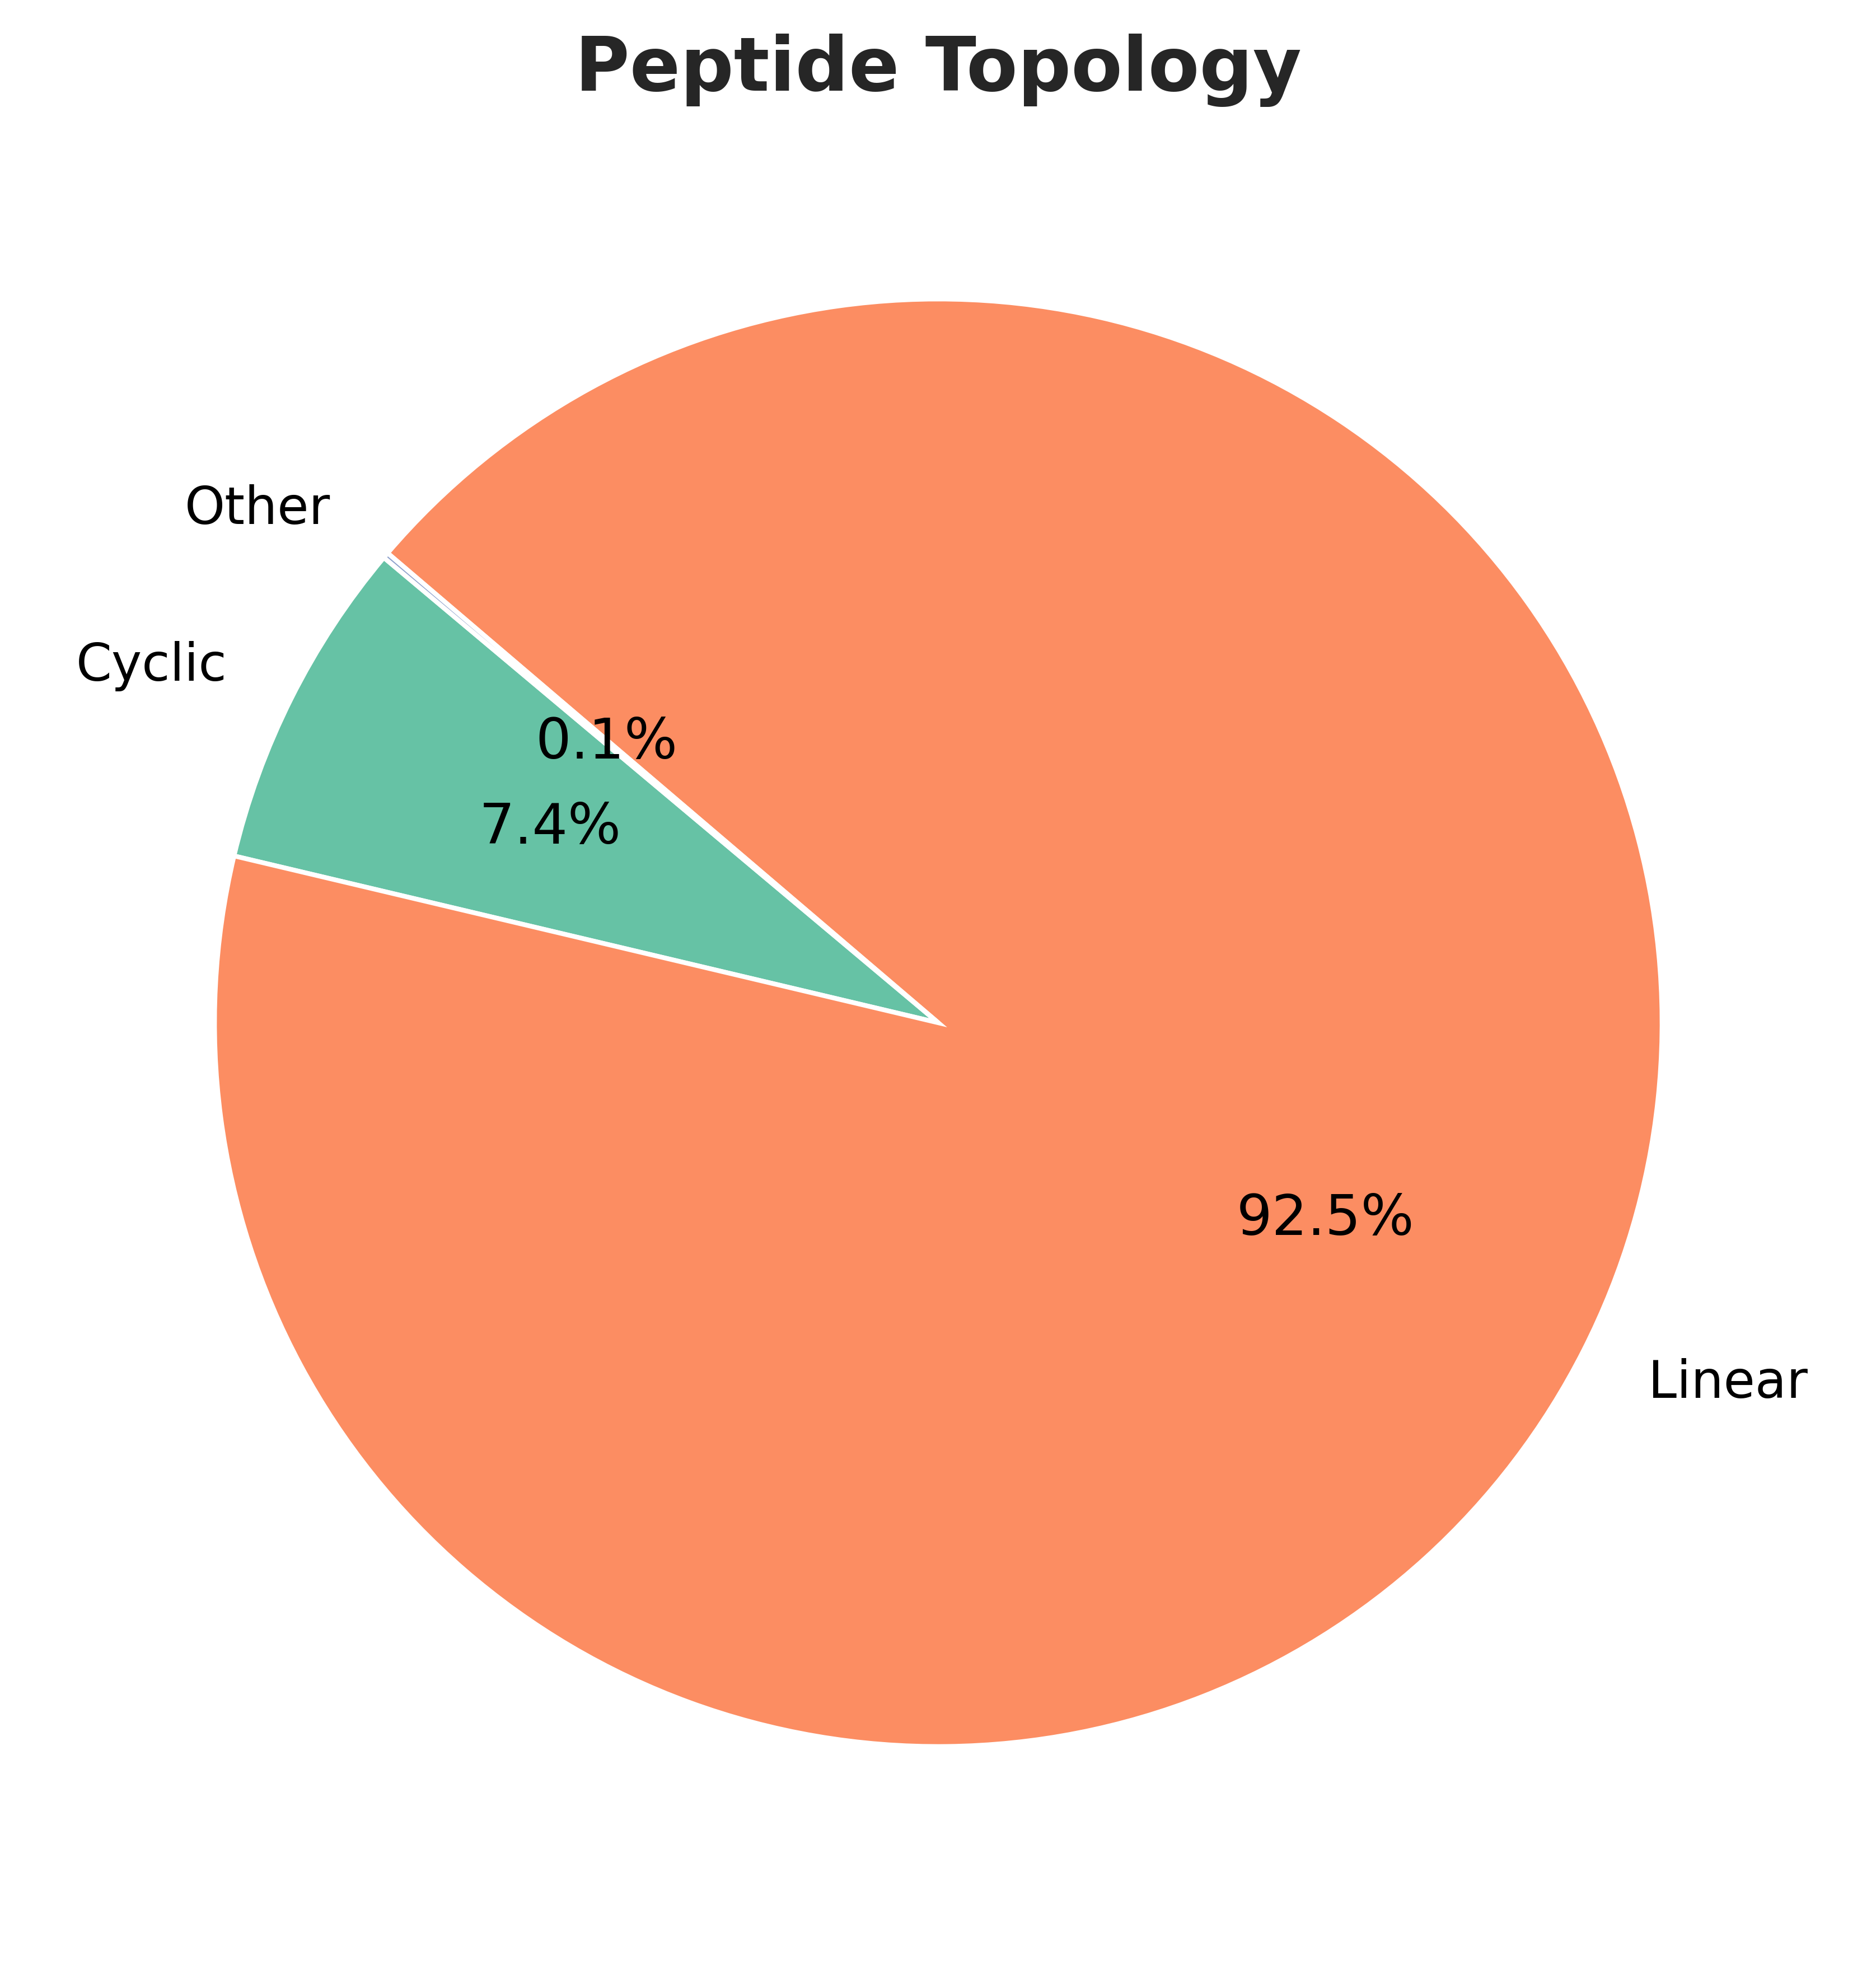

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style="white")

# Original data
topology_data = pd.DataFrame({
    "Type": ["Bicyclic", "Branched", "Cyclic", "Disulfide Bonding",
             "Linear", "Macrocyclized", "Multiple disulfide bridges", "Stapled", None],
    "Count": [16, 16, 912, 3, 12219, 4, 10, 34, 1]
})

# Replace NA with "Unclassified"
topology_data["Type"] = topology_data["Type"].fillna("Unclassified")

# Map to 3 categories
def group_category(x):
    if x == "Linear":
        return "Linear"
    elif x in ["Cyclic", "Macrocyclized", "Stapled",
               "Disulfide Bonding", "Multiple disulfide bridges", "Bicyclic"]:
        return "Cyclic"
    else:
        return "Other"

topology_data["Group"] = topology_data["Type"].apply(group_category)

# Summarize by group
summary = topology_data.groupby("Group")["Count"].sum().reset_index()

# Plot
colors = sns.color_palette("Set2")
plt.figure(figsize=(6, 6), dpi=600)
plt.pie(
    summary["Count"],
    labels=summary["Group"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={"color": "black"}
)
plt.title("Peptide Topology", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("Peptide_Topology_Simple_600dpi.png", dpi=600)
plt.show()


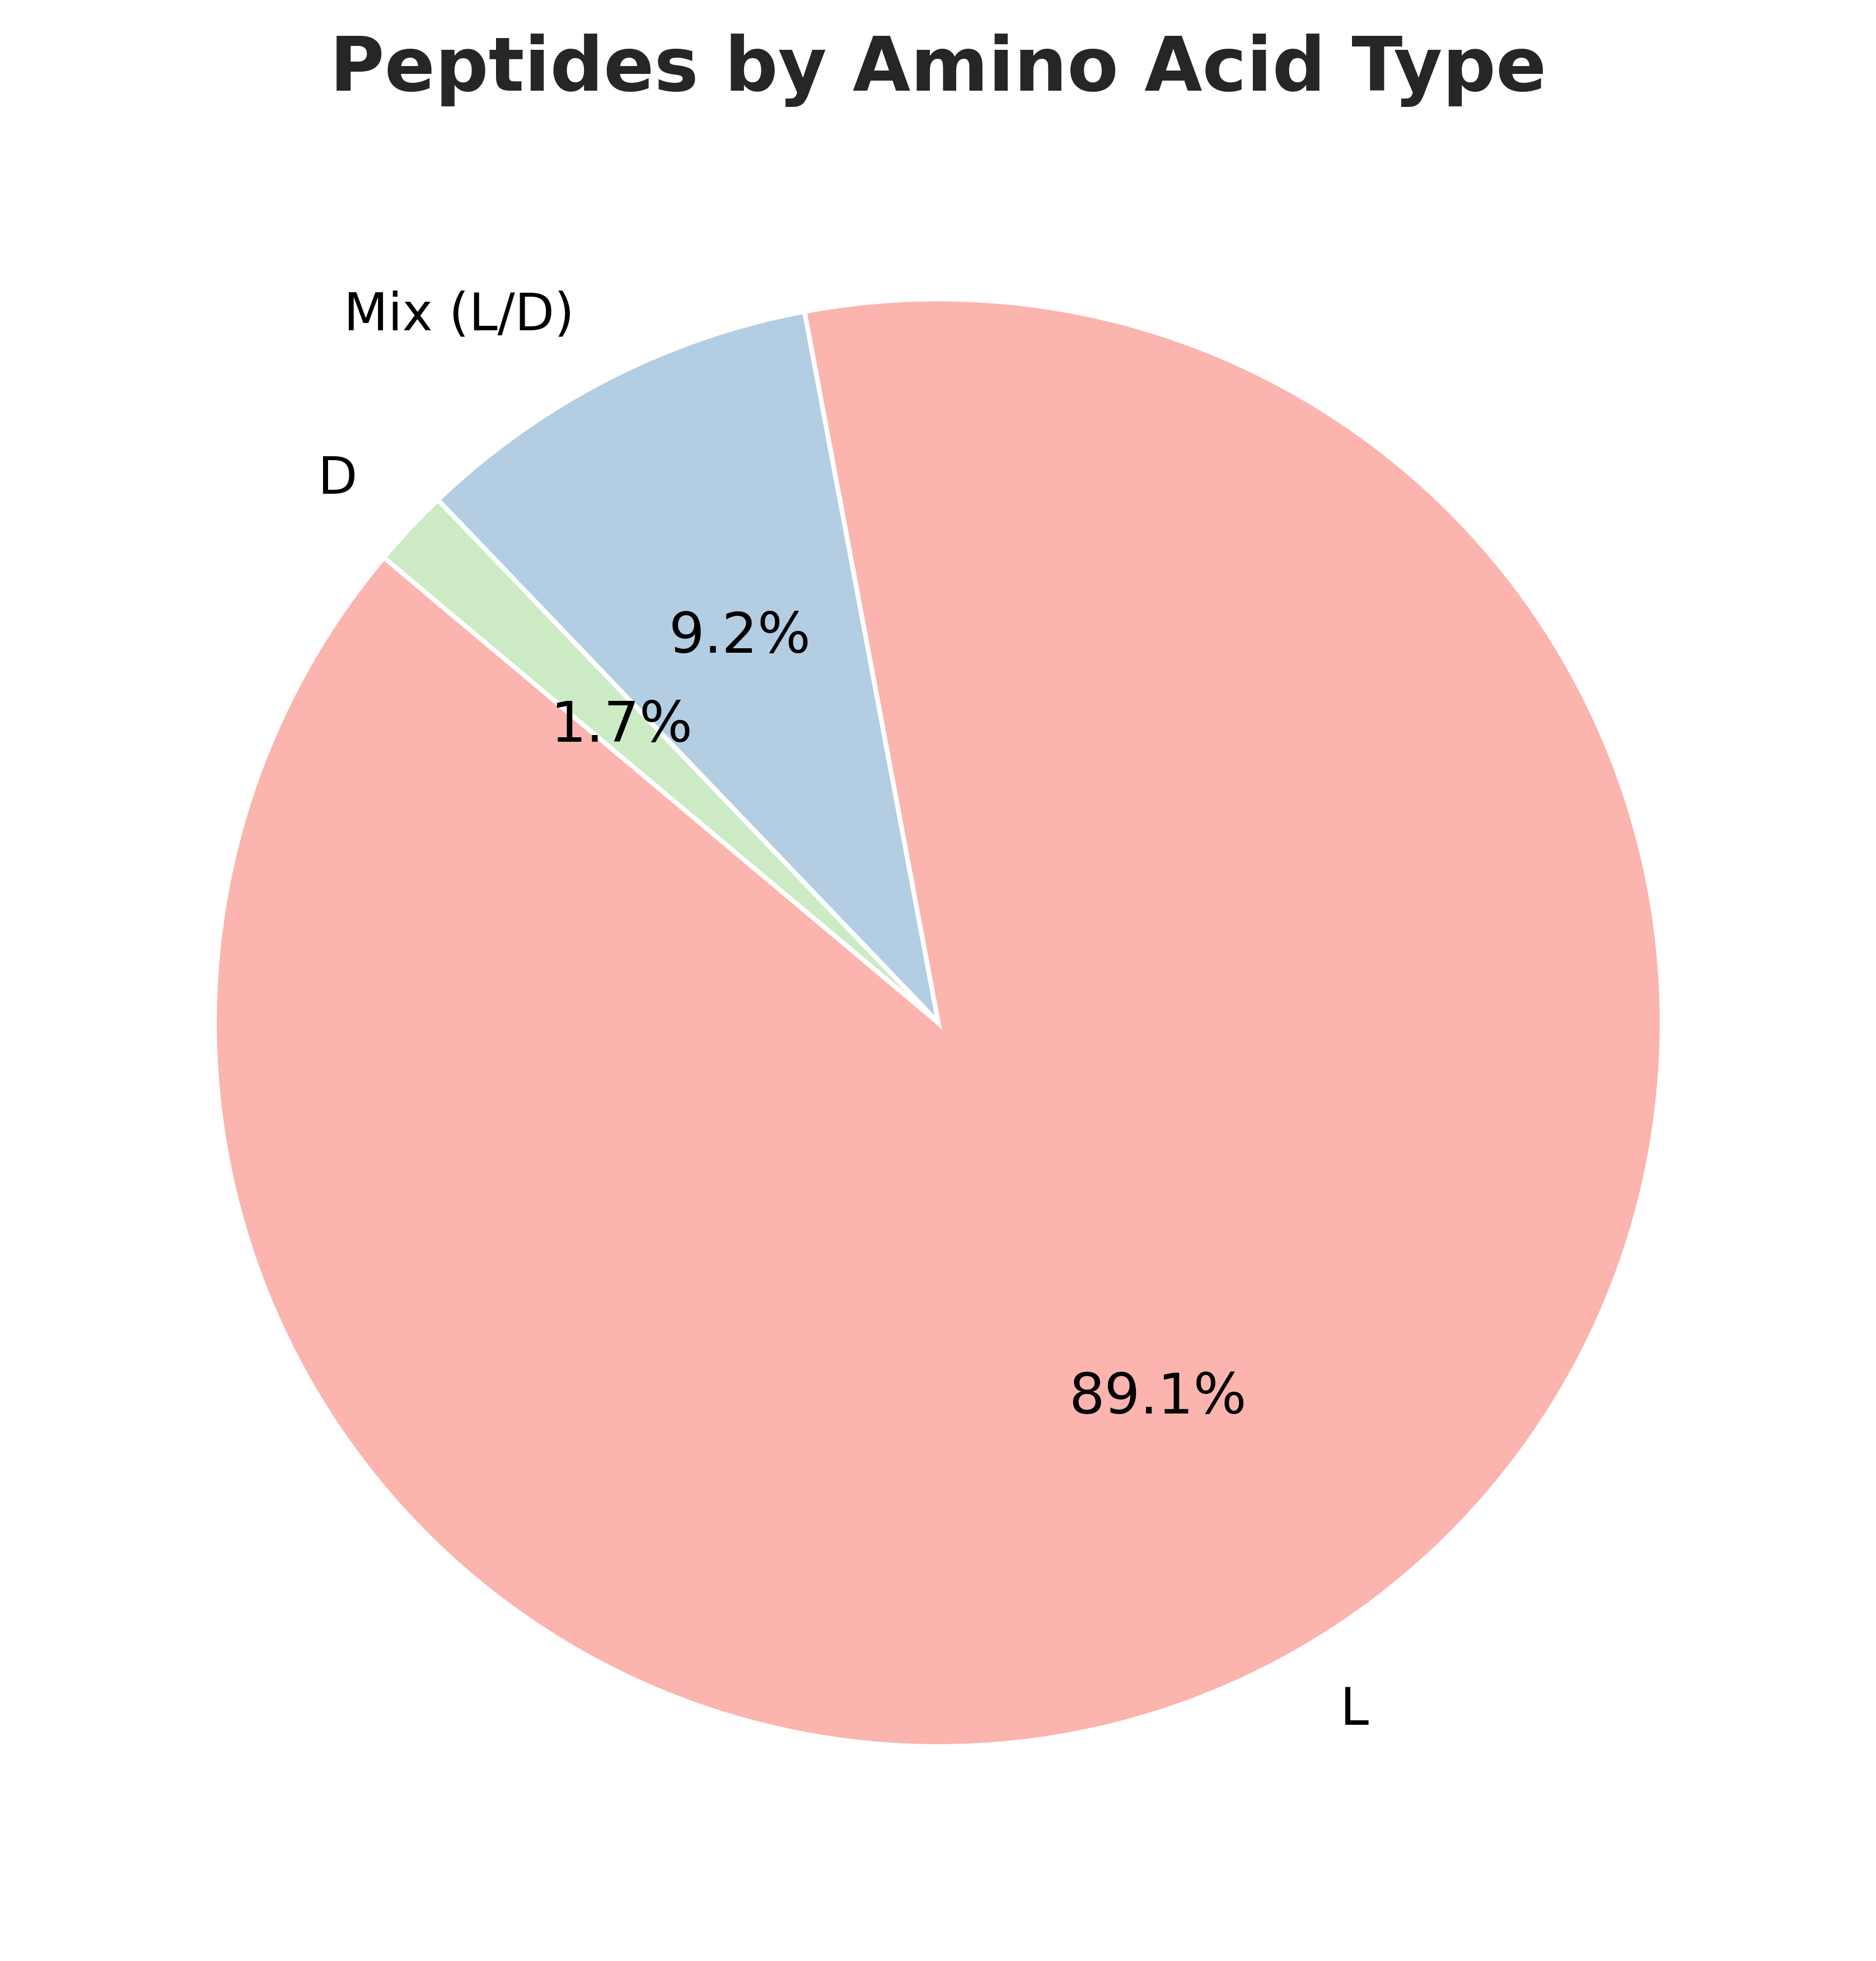

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="white")

# Data
aa_data = pd.DataFrame({
    "Type": ["L", "Mix (L/D)", "D"],
    "Count": [11728, 1210, 229]
})

# Calculate percent and label
aa_data["Percent"] = round(aa_data["Count"] / aa_data["Count"].sum() * 100, 1)
aa_data["Label"] = aa_data["Type"].astype(str)

# Plot
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(6, 6), dpi=600)
plt.pie(
    aa_data["Count"],
    labels=aa_data["Label"],
    colors=colors,
    autopct="%1.1f%%",
    startangle=140,
    textprops={"color": "black"}
)

plt.title("Peptides by Amino Acid Type", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.savefig("Pie_Amino_Acid_Type_600dpi.png", dpi=600)
plt.show()


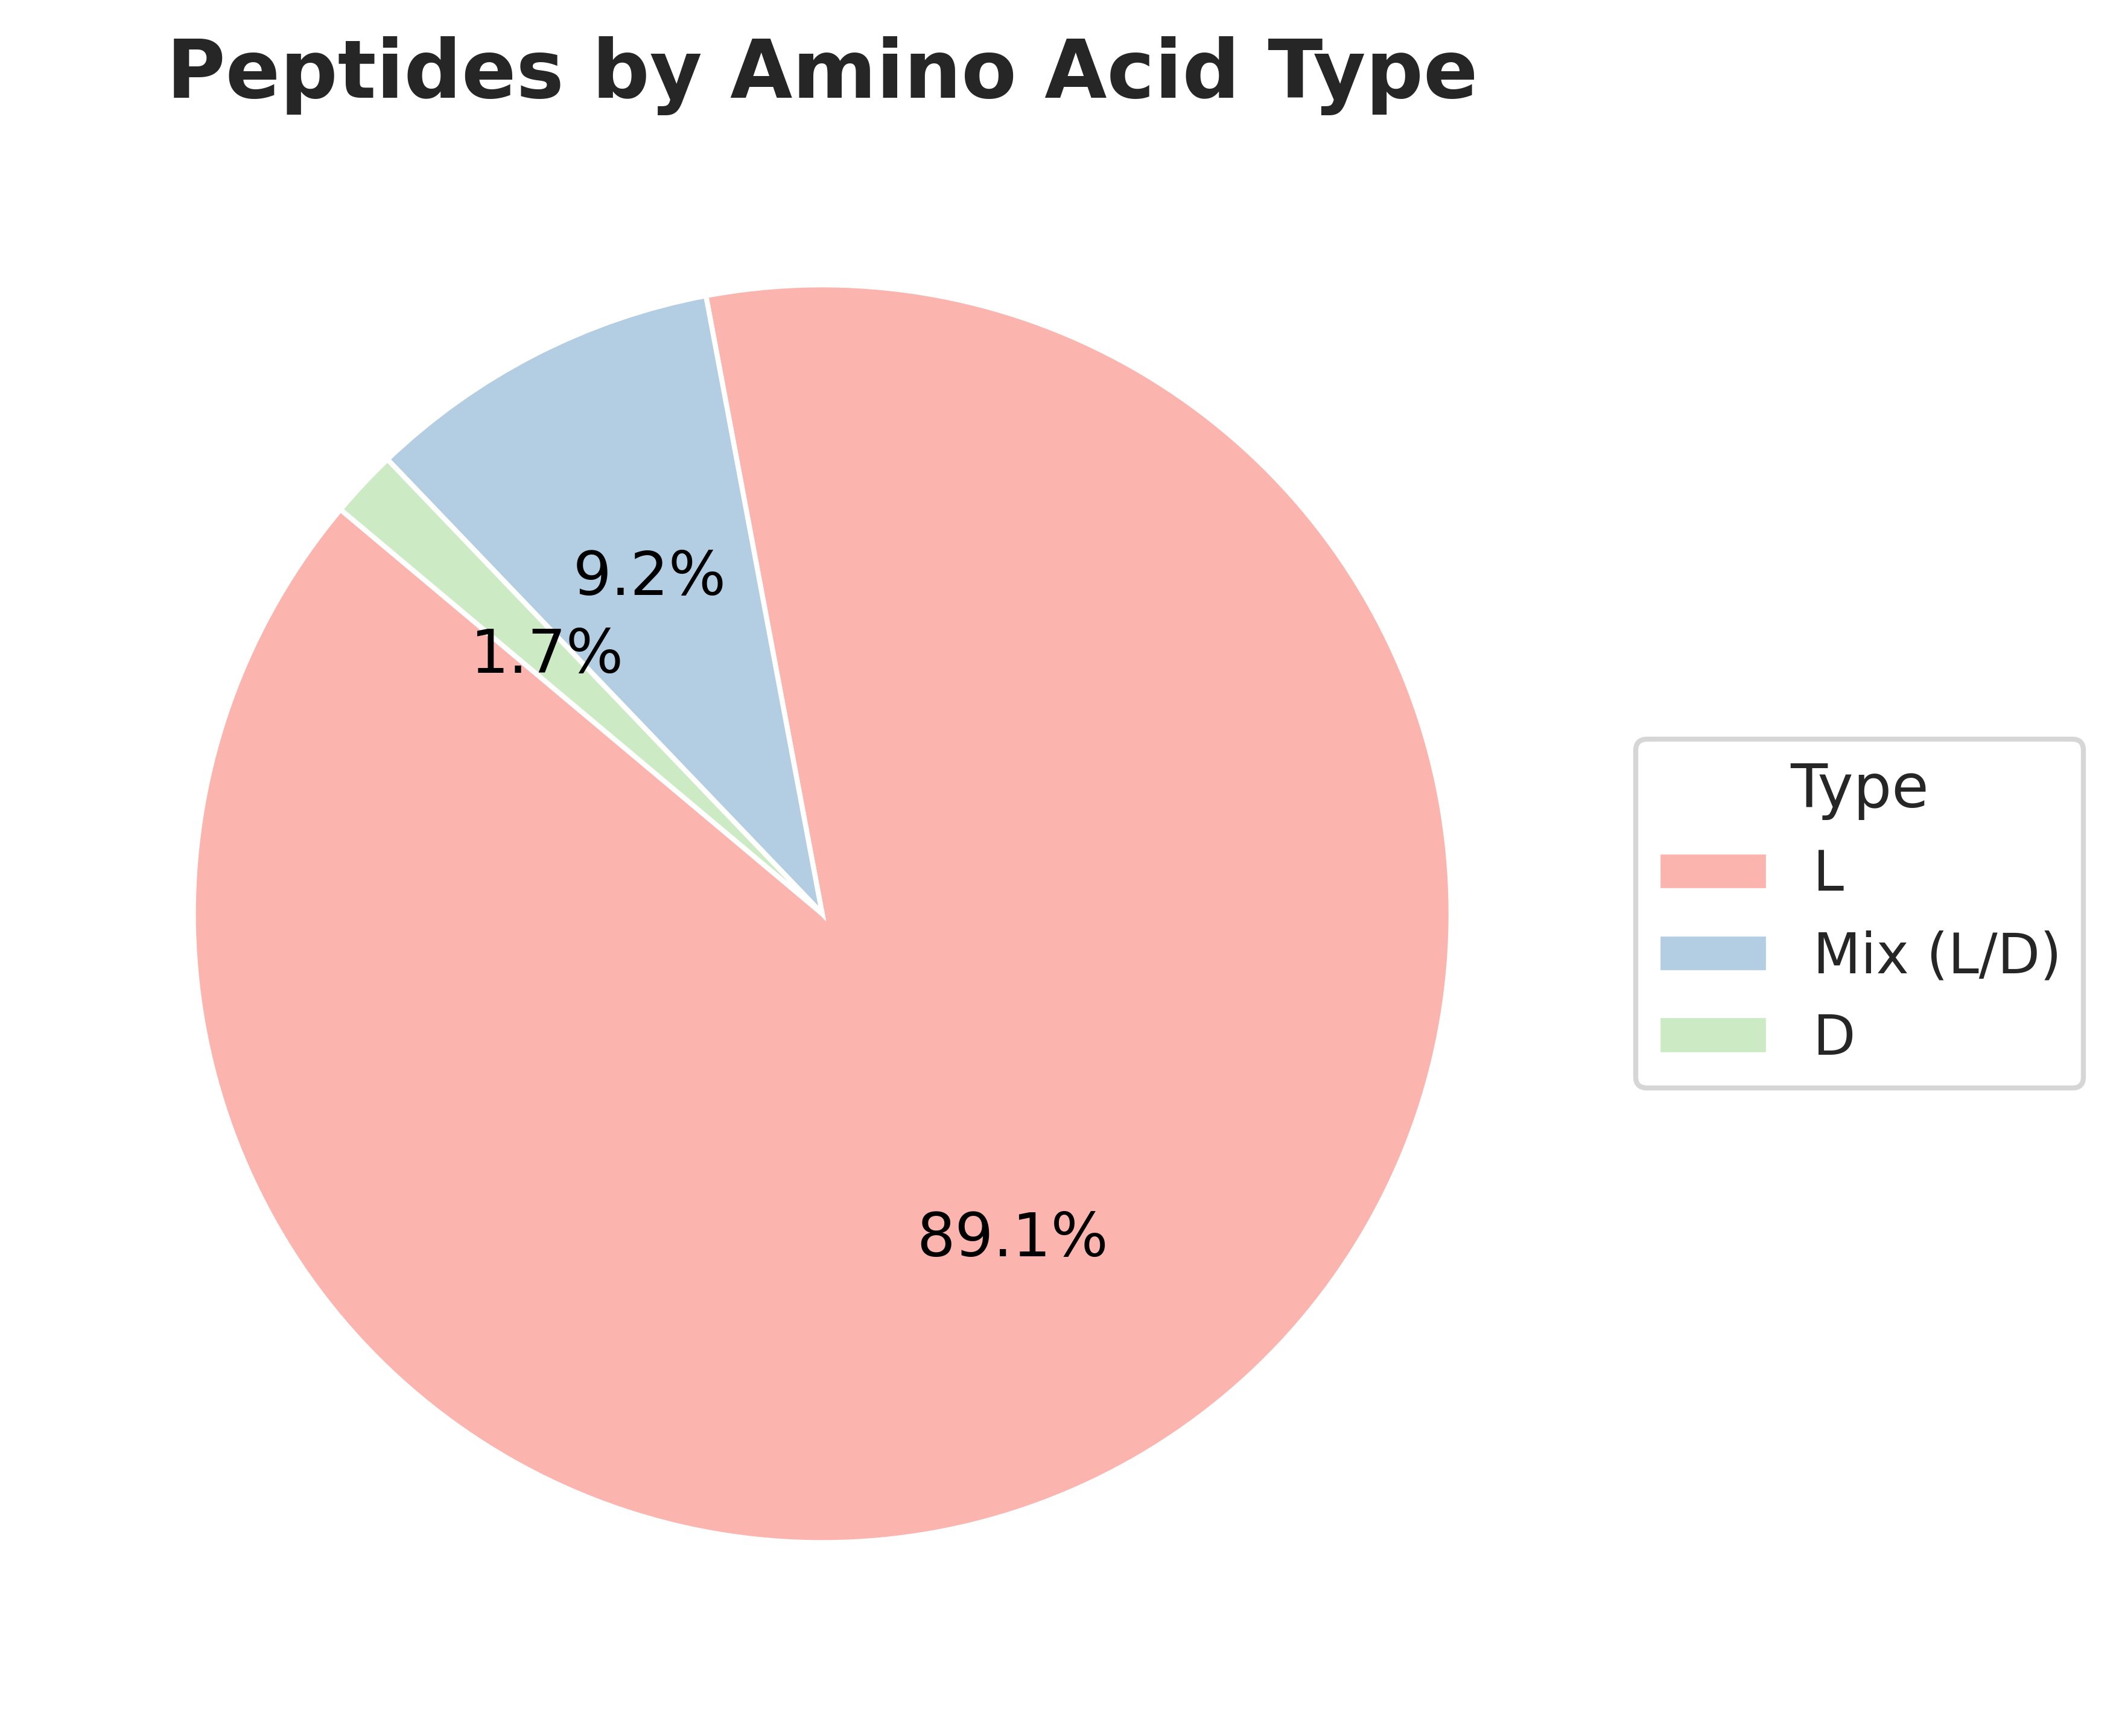

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set_theme(style="white")

# Data
aa_data = pd.DataFrame({
    "Type": ["L", "Mix (L/D)", "D"],
    "Count": [11728, 1210, 229]
})

# Calculate percentage
aa_data["Percent"] = aa_data["Count"] / aa_data["Count"].sum()

# Plot
colors = sns.color_palette("Pastel1")
plt.figure(figsize=(6, 6), dpi=600)
plt.pie(
    aa_data["Count"],
    labels=None,  # No external labels
    colors=colors,
    autopct=lambda pct: f"{pct:.1f}%",  # Percentage inside
    startangle=140,
    textprops={"color": "black", "fontsize": 12}
)

plt.title("Peptides by Amino Acid Type", fontsize=16, fontweight="bold")

# Add a legend instead of outside labels
plt.legend(aa_data["Type"], title="Type", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig("Pie_Amino_Acid_Type_Internal_600dpi.png", dpi=600)
plt.show()
